<a href="https://colab.research.google.com/github/VladOS95-cyber/deeplearning_practice/blob/main/SOP_Fraud_Probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOP - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=a69cbec20e230cc1d0355158e331f88ff24a9fab3c971175d6e315650cf98488
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
scaled_X = sc.fit_transform(X)

##Training the SOM


In [6]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15)

som.random_weights_init(scaled_X)
som.train_random(scaled_X, 100)

##Visualizing the results


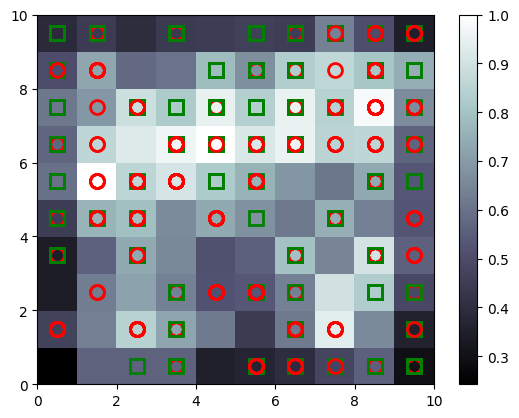

In [7]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(scaled_X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2
       )
show()

## Finding the frauds


In [11]:
mappings = som.win_map(scaled_X)
frauds = np.concatenate((mappings[(1, 5)],
                         mappings[(4, 6)],
                         mappings[(8, 7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [12]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [13]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

## Initializing the ANN

In [15]:
import tensorflow as tf

ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=2, activation='relu', input_dim = 15),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

## Compiling the ANN

In [16]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the ANN

In [17]:
ann.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.5990 - accuracy: 0.7971
Epoch 2/2
690/690 [==============================] - 2s 2ms/step - loss: 0.2525 - accuracy: 0.9812


## Predicting probabilities of frauds

In [23]:
predicted_result = ann.predict(customers)
predicted_result =  np.concatenate((dataset.iloc[:, 0:1].values, predicted_result), axis = 1)
predicted_result = predicted_result[predicted_result[:, 1].argsort()]

22/22 [==============================] - 0s 2ms/step


In [24]:
for i in predicted_result:
    for j in i:
        print(j, end=" ")
    print()

15757434.0 0.0005980286514386535 
15778589.0 0.0019532039295881987 
15699340.0 0.001981413457542658 
15615296.0 0.0022790811490267515 
15734578.0 0.003353901207447052 
15684440.0 0.003381000831723213 
15644400.0 0.0034274340141564608 
15571415.0 0.0035115231294184923 
15568469.0 0.004698838107287884 
15673907.0 0.004951607435941696 
15603565.0 0.0054496959783136845 
15776921.0 0.005674660671502352 
15737909.0 0.006017238367348909 
15568162.0 0.006044656503945589 
15646594.0 0.0062461174093186855 
15567919.0 0.00644537853077054 
15641007.0 0.0070437234826385975 
15660144.0 0.007063397206366062 
15638751.0 0.007384312804788351 
15611682.0 0.007930664345622063 
15672894.0 0.008031303063035011 
15664720.0 0.008177554234862328 
15739548.0 0.008386530913412571 
15779207.0 0.008487658575177193 
15664793.0 0.009026910178363323 
15761733.0 0.00906260497868061 
15672637.0 0.009319006465375423 
15734008.0 0.009534524753689766 
15665087.0 0.009875854477286339 
15727811.0 0.009970387443900108 
1560